# Capstone Project - Finnish...

## Assignment Instructions from the course

Coursera Course: _Applied Data Science Capstone_

You have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to *explore or compare neighborhoods or cities*
of your choice **or** to *come up with a problem that you can use the Foursquare location data to solve*. If you cannot think of an idea or a problem, here are some ideas to get you started:

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.

2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.


For the first week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)


For the second week, the final deliverables of the project will be:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):
    - **Introduction** where you discuss the business problem and who would be interested in this project.
    - **Data** where you describe the data that will be used to solve the problem and the source of the data.
    - **Methodology** section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
    - **Results** section where you discuss the results.
    - **Discussion** section where you discuss any observations you noted and any recommendations you can make based on the results.
    - **Conclusion** section where you conclude the report.
3. Your choice of a presentation or blogpost. (10 marks)


## Working notes

Wikipedia:
- Luettelo Suomen kunnista, sisältäen mm. väkiluku ja pinta-ala: https://fi.wikipedia.org/wiki/Luettelo_Suomen_kunnista
- Luettelo Suomen maakunnista, sis samat: https://fi.wikipedia.org/wiki/Suomen_maakunnat
- Luettelo Suomen postinumeroista kunnittain: https://fi.wikipedia.org/wiki/Luettelo_Suomen_postinumeroista_kunnittain


- http://tilastokeskus.fi/org/avoindata/paikkatietoaineistot.html

Tilastokeskus, Paavo:
- Tilastokeskus, Paavo kuvaus (postinumeroalueittainen avoin tieto): http://tilastokeskus.fi/tup/paavo/paavo_kuvaus_fi.pdf
- Tilastokeskuksen PX-Web-tietokannat (Paavo): http://pxnet2.stat.fi/PXWeb/pxweb/fi/Postinumeroalueittainen_avoin_tieto/
- PX-Web:ssä valittu 2019 -aineisto => 9. Kaikki tietoryhmät (päivitetty 22.1.2019) ja seuraavalla sivulla valittu kaikki postinumeroalueet ja kaikki tiedot => valinta yhteensä 314 808 taulukkosolua, lataus "puolipiste-eroteltu (otsikollinen)".  Tallennettu tiedostoon *paavo_9_koko.csv*
- from the saved file, first two rows (empty rows in the beginning of the file) were removed.
- coordinates used: **EUREF-FIN** coordinate system (**ETRS89-TM35FIN**)


- toinen lähde: http://spatialreference.org/ref/epsg/?search=finland&srtext=Search
- antaa EPSG:2393: KKJ / Finland Uniform Coordinate System
- tämäkin lähde auttoi: http://www.kolumbus.fi/eino.uikkanen/geodocsgb/ficoords.htm
- Test coordinates visually (are they in right place) here: https://suomenkartta.fi/karttakoordinaatit/


Protocol: Web Feature Service (WFS)
- In python lib OWSLib 0.17.1 here: https://geopython.github.io/OWSLib/
- returns GML files?


# Solution

- Using FourSquare to access venue data in selected areas
- Using Folium to show results on map
- Using Paavo data to get finnish postal codes and some information about each postal code area

...

## Note: clear FS ids before submission!

FS\_ prefixed parameters refer to FourSquare service and its use.  Don't share the following two parameters, even though moderate personal use such as this notebook is free of cost.

In [1]:

# CLEAR THESE FOR THE FINAL DELIVERY

FS_CLIENT_ID = 'POKB0VB5FPZYN0ER35ARSDR3QZE3CKSVZ3I1FQ4FZWEFLARL' # your Foursquare ID
FS_CLIENT_SECRET = 'YQKQR2Q530BQ21CFBNAQZ4DQF3QOLMO5D0CADDA1BQH1FPZU' # your Foursquare Secret

## Step 0 - import libraries

In [43]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import os
import math
import requests # library to handle requests
import operator

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
#from IPython.display import Image 
#from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
# OR
#!pip install folium
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing

#!pip install seaborn
import seaborn as sns

# Need to install pyproj first, if possible, check this out...
#!pip install pyproj
import pyproj

import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


## Step 1 - Paavo data

### Step 1.1 - Load Paavo data

In [3]:
PAAVO_FILENAME = 'paavo_9_koko_sarkain_fixed.csv'

paavo_df = None
    
if os.path.isfile(PAAVO_FILENAME):

    paavo_df = pd.read_csv(PAAVO_FILENAME, sep='\t', encoding='iso-8859-1')
    print("Loaded Paavo data.\nFound {} rows of data.".format(paavo_df.shape[0]))

else:
    print("Did not find data file:", PAAVO_FILENAME)
    print("Are you perhaps in a wrong working directory?  Currently you are in:", os.getcwd())
    print("Use commands like '!cd ...' or in python 'os.chdir()' to fix your working directory.")

# Show a sample of data to understand what we have
paavo_df.head()

Loaded Paavo data.
Found 3027 rows of data.


,Postinumeroalue,X-koordinaatti metreinä,Y-koordinaatti metreinä,Postinumeroalueen pinta-ala,"Asukkaat yhteensä, 2017 (HE)","Naiset, 2017 (HE)","Miehet, 2017 (HE)","Asukkaiden keski-ikä, 2017 (HE)","0-2-vuotiaat, 2017 (HE)","3-6-vuotiaat, 2017 (HE)",...,"T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2016 (TP)","U Kansainvälisten organisaatioiden ja toimielinten toiminta, 2016 (TP)","X Toimiala tuntematon, 2016 (TP)","Asukkaat yhteensä, 2016 (PT)","Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)"
0,KOKO MAA,429300,7084490,390813692400,5513130,2793999,2719131,42,160297,240994,...,656,343,59,5503297,2275679,355837,894178,407905,1389830,179868
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),385114,6672391,2353278,18284,9613,8671,41,434,521,...,0,17,1,18035,10032,856,1812,1198,3326,811
2,00120 Punavuori (Helsinki ),385614,6671378,414010,7108,3751,3357,40,183,234,...,0,0,0,7055,3872,336,817,428,1242,360
3,00130 Kaartinkaupunki (Helsinki ),386228,6671492,428960,1508,772,736,41,34,48,...,0,12,0,1522,839,61,170,104,258,90
4,00140 Kaivopuisto - Ullanlinna (Helsinki ),386410,6670742,931841,7865,4277,3588,41,224,250,...,0,1,0,7934,4218,325,929,518,1519,425


### Step 1.2 - Paavo data, exploration

Here we explore the pure Paavo data features / columns as they are available from Tilastokeskus, that is, no fixes, cleaning or data manipulation on values.

Paavo data contains data in 105 columns for 3026 postal codes plus for the whole finland as well.  Below are the different datacolumns and their values for whole Finland, Helsinki downtown and a random rural area. The data is from years 2016 and 2017, depending on the data.

In [4]:
# Create a subset dataframe to inspect data.  In the transposed dataframe:
#    - Column 0 is for whole Finland,
#    - Column 1 is for postal code 00100 (Finlands Capital, center)
#    - Column 2600 is for postal code 89840 (very rural area)
#
paavo_fin_df = paavo_df.T[[0, 1, 2600]]
paavo_fin_df.columns = ["Whole Finland", paavo_df.iloc[1,0], paavo_df.iloc[2600,0]]


#### Step 1.2.1 - Paavo data exploration - population and age groups, 2017

In [5]:
paavo_fin_df[4:28]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Asukkaat yhteensä, 2017 (HE)",5513130,18284,57
"Naiset, 2017 (HE)",2793999,9613,20
"Miehet, 2017 (HE)",2719131,8671,37
"Asukkaiden keski-ikä, 2017 (HE)",42,41,63
"0-2-vuotiaat, 2017 (HE)",160297,434,0
"3-6-vuotiaat, 2017 (HE)",240994,521,0
"7-12-vuotiaat, 2017 (HE)",369950,711,0
"13-15-vuotiaat, 2017 (HE)",177163,274,0
"16-17-vuotiaat, 2017 (HE)",117857,185,0
"18-19-vuotiaat, 2017 (HE)",120218,264,1


#### Step 1.2.2 - Paavo data exploration - Education, 2017

In [6]:
paavo_fin_df[28:35]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"18 vuotta täyttäneet yhteensä, 2017 (KO)",4446869,16159,57
"Perusasteen suorittaneet, 2017 (KO)",1112261,1996,30
"Koulutetut yhteensä, 2017 (KO)",3334608,14163,27
"Ylioppilastutkinnon suorittaneet, 2017 (KO)",303230,2618,1
"Ammatillisen tutkinnon suorittaneet, 2017 (KO)",2035528,2942,24
"Alemman korkeakoulututkinnon suorittaneet, 2017 (KO)",518969,2899,2
"Ylemmän korkeakoulututkinnon suorittaneet, 2017 (KO)",476881,5704,0


#### Step 1.2.3 - Paavo data exploration - Inhabitant income, 2016

In [7]:
paavo_fin_df[35:42]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"18 vuotta täyttäneet yhteensä, 2016 (HR)",4431392,15935,60
"Asukkaiden keskitulot, 2016 (HR)",23812,38985,16166
"Asukkaiden mediaanitulot, 2016 (HR)",20925,26642,14939
"Alimpaan tuloluokkaan kuuluvat asukkaat, 2016 (HR)",886431,2856,26
"Keskimmäiseen tuloluokkaan kuuluvat asukkaat, 2016 (HR)",2658687,6668,31
"Ylimpään tuloluokkaan kuuluvat asukkaat, 2016 (HR)",886274,6411,3
"Asukkaiden ostovoimakertymä, 2016 (HR)",105520349469,621218859,969978


#### Step 1.2.4 - Paavo data exploration - Households, 2017

In [8]:
paavo_fin_df[42:57]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Taloudet yhteensä, 2017 (TE)",2680077,10205,34
"Talouksien keskikoko, 2017 (TE)",2.0,1.8,1.7
"Asumisväljyys, 2017 (TE)",40.5,38.6,56.4
"Nuorten yksinasuvien taloudet, 2017 (TE)",291052,2101,1
"Lapsettomat nuorten parien taloudet, 2017 (TE)",115168,861,0
"Lapsitaloudet, 2017 (TE)",570112,1326,0
"Pienten lasten taloudet, 2017 (TE)",142781,400,0
"Alle kouluikäisten lasten taloudet, 2017 (TE)",278849,715,0
"Kouluikäisten lasten taloudet, 2017 (TE)",263490,541,0
"Teini-ikäisten lasten taloudet, 2017 (TE)",221106,373,0


#### Step 1.2.5 - Paavo data exploration - Household income, 2016

In [9]:
paavo_fin_df[57:64]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Taloudet yhteensä, 2016 (TR)",2654657,10042,36
"Talouksien keskitulot, 2016 (TR)",39270,61679,26975
"Talouksien mediaanitulot, 2016 (TR)",31824,38895,23598
"Alimpaan tuloluokkaan kuuluvat taloudet, 2016 (TR)",677223,1697,13
"Keskimmäiseen tuloluokkaan kuuluvat taloudet, 2016 (TR)",1500917,4123,22
"Ylimpään tuloluokkaan kuuluvat taloudet, 2016 (TR)",476517,4222,1
"Talouksien ostovoimakertymä, 2016 (TR)",104247634221,619383515,971110


#### Step 1.2.6 - Paavo data exploration - Buildings, 2017

In [10]:
paavo_fin_df[64:72]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Kesämökit yhteensä, 2017 (RA)",507200,0,103
"Rakennukset yhteensä, 2017 (RA)",1523196,634,90
"Muut rakennukset yhteensä, 2017 (RA)",228770,326,14
"Asuinrakennukset yhteensä, 2017 (RA)",1294426,308,76
"Asunnot, 2017 (RA)",2946814,11884,48
"Asuntojen keskipinta-ala, 2017 (RA)",80.1,65.9,97.7
"Pientaloasunnot, 2017 (RA)",1568029,2,48
"Kerrostaloasunnot, 2017 (RA)",1378785,11882,0


#### Step 1.2.7 - Paavo data exploration - Jobs, 2016

In [11]:
paavo_fin_df[72:98]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Työpaikat yhteensä, 2016 (TP)",2094313,48470,16
"Alkutuotannon työpaikat, 2016 (TP)",56104,104,0
"Jalostuksen työpaikat, 2016 (TP)",461153,1805,0
"Palveluiden työpaikat, 2016 (TP)",1576997,46560,16
"A Maatalous, metsätalous ja kalatalous, 2016 (TP)",56104,104,0
"B Kaivostoiminta ja louhinta, 2016 (TP)",5283,0,0
"C Teollisuus, 2016 (TP)",283209,752,0
"D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2016 (TP)",11714,554,0
"E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2016 (TP)",10703,1,0
"F Rakentaminen, 2016 (TP)",150244,498,0


#### Step 1.2.8 - Paavo data exploration - Main type of activity, 2016

In [12]:
paavo_fin_df[98:]

,Whole Finland,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),89840 Ylä-Vuokki (Suomussalmi )
"Asukkaat yhteensä, 2016 (PT)",5503297,18035,61
"Työlliset, 2016 (PT)",2275679,10032,13
"Työttömät, 2016 (PT)",355837,856,6
"Lapset 0-14 -vuotiaat, 2016 (PT)",894178,1812,0
"Opiskelijat, 2016 (PT)",407905,1198,1
"Eläkeläiset, 2016 (PT)",1389830,3326,40
"Muut, 2016 (PT)",179868,811,1


### Step 1.3 - Clean data

Paavo contains ".." values (two dots) in certain columns for such postal code areas where there are less than 30 cases in total for the data section.  Here cleaning means removing such rows from data so that we have only numeric values in columns other than the first column. 

Also, drop the first row of data which contains totals for whole Finland.

But first, define some helper functions.

In [13]:
# Helper functions to analyze / report data values.

# Find out how many of each value there are in a list.
# Takes in a list and returns a dictionary, whose keys are list values, and values are # of occurrences on list
def find_uniques_with_counts(l, key_counts={}):
    for list_value in l:
        list_value = str(list_value)
        if list_value in key_counts.keys():
            key_counts[list_value] = key_counts[list_value] + 1
        else:
            key_counts[list_value] = 1
    return key_counts

def print_uniques_with_counts_dict(key_counts, print_threshold=0, total_values=0):
    for i in (range(len(key_counts.keys()))):
        max_key = max(key_counts.items(), key=operator.itemgetter(1))[0]
        if total_values == 0:
            total_percentage = ""
        else:
            total_percentage = int(100*(key_counts[max_key]/total_values))
        if key_counts[max_key] > print_threshold:
            print("{:>25} -- {:3} ({:2}%)".format(max_key, key_counts[max_key], total_percentage))
        key_counts.pop(max_key, None)

# Helper function to do the filtering and report as it goes.
def clean_paavo(df, col_index):
    col_name = df.columns[col_index]
    print("Cleaning away postal codes which have less than 30 inhabitants in column\n", col_name)
    count_before = df.shape[0]
    filtered_df = df[df[col_name] >= 30]
    count_after = filtered_df.shape[0]
    print("\tPostal Codes cleaned away:   ", count_before - count_after)
    print("\tContinuing with:              ", count_after, "Postal Codes\n")
    return filtered_df

print("find_uniques_with_counts() defined.")
print("print_uniques_with_counts_dict() defined.")
print("clean_paavo() defined.")

find_uniques_with_counts() defined.
print_uniques_with_counts_dict() defined.
clean_paavo() defined.


Check the distribution of Paavo data column dtypes (of the dataframe). Remember, there are 105 columns in total.

In [14]:
t1 = paavo_df.dtypes.tolist()
d = find_uniques_with_counts(t1)
print_uniques_with_counts_dict(d, 0, 105)

                   object --  91 (86%)
                    int64 --  14 (13%)


Now clean the ".." dots away.

In [15]:
print("\nCleaning Paavo data, start with {} postal codes.\n".format(paavo_df.shape[0]))

paavo_filtered_df = paavo_df

# filter on population structure (age) having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 4)

# filter on education having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 28)

# filter on income having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 35)

# filter on households having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 42)

# filter on household income having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 57)

# filter on jobs having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 72)

# filter on main type of activity having less than 30 cases
paavo_filtered_df = clean_paavo(paavo_filtered_df, 98)



Cleaning Paavo data, start with 3027 postal codes.

Cleaning away postal codes which have less than 30 inhabitants in column
 Asukkaat yhteensä, 2017 (HE)
	Postal Codes cleaned away:    75
	Continuing with:               2952 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 18 vuotta täyttäneet yhteensä, 2017 (KO)
	Postal Codes cleaned away:    11
	Continuing with:               2941 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 18 vuotta täyttäneet yhteensä, 2016 (HR)
	Postal Codes cleaned away:    4
	Continuing with:               2937 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Taloudet yhteensä, 2017 (TE)
	Postal Codes cleaned away:    107
	Continuing with:               2830 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Taloudet yhteensä, 2016 (TR)
	Postal Codes cleaned away:    1
	Continuing with:               282

Then try to convert the rest of columns to some numeric type, preferrence order is int, int64 and float.

In [16]:
print("Ensure number values in columns from 3 to end.\n")
for i in range(3, len(paavo_filtered_df.columns)):
    colname = paavo_filtered_df.columns[i]
    # don't convert floats, as they would become ints and lose the decimal parts.
    if str(paavo_filtered_df.iloc[:,i].dtype) != "float64":
        try:
            paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype("int")
        except:
            try:
                paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype(np.int64)
            except:
                try:
                    paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype("float")
                except:
                    print("*** Failed to convert {}th column ({}) to number".format(i, colname))

print("Column data types after cleaning:\n")
                    
t1 = paavo_filtered_df.dtypes.tolist()
d = find_uniques_with_counts(t1)
print_uniques_with_counts_dict(d, 0, 105)

Ensure number values in columns from 3 to end.

Column data types after cleaning:

                    int32 --  97 (92%)
                    int64 --   4 ( 3%)
                  float64 --   3 ( 2%)
                   object --   1 ( 0%)


Drop Finland country level totals from further analysis and check the data head after cleaning.

In [17]:
paavo_filtered_df = paavo_filtered_df.iloc[1:,:]
paavo_filtered_df.reset_index(inplace=True)
paavo_filtered_df.drop(columns=["index"], inplace=True)
paavo_filtered_df.head()

,Postinumeroalue,X-koordinaatti metreinä,Y-koordinaatti metreinä,Postinumeroalueen pinta-ala,"Asukkaat yhteensä, 2017 (HE)","Naiset, 2017 (HE)","Miehet, 2017 (HE)","Asukkaiden keski-ikä, 2017 (HE)","0-2-vuotiaat, 2017 (HE)","3-6-vuotiaat, 2017 (HE)",...,"T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2016 (TP)","U Kansainvälisten organisaatioiden ja toimielinten toiminta, 2016 (TP)","X Toimiala tuntematon, 2016 (TP)","Asukkaat yhteensä, 2016 (PT)","Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)"
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),385114,6672391,2353278,18284,9613,8671,41,434,521,...,0,17,1,18035,10032,856,1812,1198,3326,811
1,00120 Punavuori (Helsinki ),385614,6671378,414010,7108,3751,3357,40,183,234,...,0,0,0,7055,3872,336,817,428,1242,360
2,00130 Kaartinkaupunki (Helsinki ),386228,6671492,428960,1508,772,736,41,34,48,...,0,12,0,1522,839,61,170,104,258,90
3,00140 Kaivopuisto - Ullanlinna (Helsinki ),386410,6670742,931841,7865,4277,3588,41,224,250,...,0,1,0,7934,4218,325,929,518,1519,425
4,00150 Eira - Hernesaari (Helsinki ),385235,6670549,1367328,9496,5129,4367,40,250,282,...,7,8,0,9527,5433,536,942,564,1523,529


### Step 1.3 - Enhance the data

- Get Latitude and Longitude values for coordinates in addition to the metric X and Y values (use pyproj for this)
- Separate the postal code number (5 digits) and the postal code area name (the rest ) from each other, into separate columns.


In [18]:
# store original columns for easier sorting of new columns to the beginning
orig_cols = paavo_filtered_df.columns.tolist()

# Get the latitude and longitude values, based on X and Y meters.
p = pyproj.Proj(proj='utm',zone=35,ellps='WGS84') # use kwarg
x_list = paavo_filtered_df.iloc[:,1].tolist()
y_list = paavo_filtered_df.iloc[:,2].tolist()
lon_list, lat_list = p(x_list, y_list, inverse=True)

# Add latitude and longitude into data
paavo_filtered_df["PC Longitude"] = lon_list
paavo_filtered_df["PC Latitude"] = lat_list

# create postal code number into a new column
paavo_filtered_df["PC"] = paavo_filtered_df.iloc[:,0].str.slice(stop=5)

# change old postal code column into one containing only the name
postal_code_column_name = paavo_filtered_df.columns[0]
paavo_filtered_df[postal_code_column_name] = paavo_filtered_df[postal_code_column_name].str.slice(start=6)


# Sort the columns so that the new columns are on the left side (easier to see)
new_cols = ["PC", postal_code_column_name, "PC Longitude", "PC Latitude"]
paavo_filtered_df = paavo_filtered_df[new_cols + orig_cols[1:]]
paavo_filtered_df.rename(columns={postal_code_column_name: "PC Name"}, inplace=True)

paavo_filtered_df.head()

,PC,PC Name,PC Longitude,PC Latitude,X-koordinaatti metreinä,Y-koordinaatti metreinä,Postinumeroalueen pinta-ala,"Asukkaat yhteensä, 2017 (HE)","Naiset, 2017 (HE)","Miehet, 2017 (HE)",...,"T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2016 (TP)","U Kansainvälisten organisaatioiden ja toimielinten toiminta, 2016 (TP)","X Toimiala tuntematon, 2016 (TP)","Asukkaat yhteensä, 2016 (PT)","Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)"
0,00100,Helsinki Keskusta - Etu-Töölö (Helsinki ),24.929290,60.172207,385114,6672391,2353278,18284,9613,8671,...,0,17,1,18035,10032,856,1812,1198,3326,811
1,00120,Punavuori (Helsinki ),24.938865,60.163257,385614,6671378,414010,7108,3751,3357,...,0,0,0,7055,3872,336,817,428,1242,360
2,00130,Kaartinkaupunki (Helsinki ),24.949856,60.164452,386228,6671492,428960,1508,772,736,...,0,12,0,1522,839,61,170,104,258,90
3,00140,Kaivopuisto - Ullanlinna (Helsinki ),24.953552,60.157772,386410,6670742,931841,7865,4277,3588,...,0,1,0,7934,4218,325,929,518,1519,425
4,00150,Eira - Hernesaari (Helsinki ),24.932508,60.155712,385235,6670549,1367328,9496,5129,4367,...,7,8,0,9527,5433,536,942,564,1523,529


Finally, create a standardized version of the Paavo data.  This is used later in analysis / clustering.

In [19]:
# Create a standardized version of Paavo data.  Don't include unnecessary columns

paavo_stan_cols = paavo_filtered_df.columns.tolist()
paavo_stan_cols = paavo_stan_cols[6:]
paavo_stan_df = paavo_filtered_df[paavo_stan_cols].astype('float64') # type conversions removes a warning
paavo_stan_np = preprocessing.StandardScaler().fit_transform(paavo_stan_df)
paavo_stan_df = pd.DataFrame(paavo_stan_np)
paavo_stan_df["PC"] = paavo_filtered_df["PC"]
paavo_stan_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,PC
0,-0.452328,4.776863,4.838401,4.697720,-0.568997,3.407284,2.724038,2.445841,1.874344,1.937963,...,3.253556,5.478789,4.745716,6.251701,2.915840,2.597545,3.406430,3.349305,6.101162,00100
1,-0.462058,1.389098,1.431900,1.338992,-0.765921,1.029136,0.815641,0.658872,0.484515,0.298065,...,-0.031457,-0.149592,1.387119,1.963403,0.734109,0.750987,0.810015,0.759059,2.356837,00120
2,-0.461983,-0.308423,-0.299244,-0.317618,-0.568997,-0.382594,-0.421160,-0.476645,-0.497112,-0.440628,...,2.287376,-0.149592,-0.305332,-0.148026,-0.419691,-0.449740,-0.282503,-0.463974,0.115223,00130
3,-0.459460,1.618566,1.737567,1.484996,-0.568997,1.417598,0.922032,0.903167,0.785807,0.563994,...,0.161779,-0.149592,1.655991,2.204272,0.687957,0.958841,1.113492,1.103348,2.896484,00140
4,-0.457275,2.112969,2.232678,1.977365,-0.765921,1.663940,1.134815,0.853403,0.397043,0.312838,...,1.514431,-0.149592,2.143262,3.050097,1.573236,0.982967,1.268602,1.108320,3.759921,00150


## Step 2 - FourSquare

### Step 2.1 - FourSquare preparations

Define more FS\_ parameters and a helper function that we can easily get venue data for those locations that we choose.

In [20]:

# FourSquare call parameters
FS_VERSION = '20180604'
FS_LIMIT = 50

venue_data_columns = [
    'PC', 
    'PC Latitude', 
    'PC Longitude',
    'Venue Id',
    'Venue', 
    'Venue Latitude', 
    'Venue Longitude', 
    'Venue Category']

# getNearbyVenues accesses FourSquare venue data, returns a dataframe.
# Helper function from 2nd lab of week 3
def getNearbyVenues(postal_codes, latitudes, longitudes, radius=500, section=False):
    
    venues_list=[]
    for pc, lat, lng in zip(postal_codes, latitudes, longitudes):
        #print(pc)

        # create the API request URL
        url = ""
        if section:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
                FS_CLIENT_ID,
                FS_CLIENT_SECRET,
                FS_VERSION,
                lat,
                lng,
                radius,
                section,
                FS_LIMIT)
        else:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                FS_CLIENT_ID,
                FS_CLIENT_SECRET,
                FS_VERSION,
                lat,
                lng,
                radius,
                FS_LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                pc, 
                lat, 
                lng,
                v['venue']['id'],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print("SOMETHING WENT WRONG DOWNLOADING {} FROM FourSquare".format(pc))

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    if nearby_venues.shape[0] == 0:
        nearby_venues = pd.DataFrame(columns=venue_data_columns)
    else:
        nearby_venues.columns = venue_data_columns
    
    return(nearby_venues)

print("getNearbyVenues() defined")


# Update directly to the fs_venue_df
def update_fs_venues(df):
    global fs_venue_df

    work_df = df

    print("Filter results in {} postal codes. Starting...".format(work_df.shape[0]))

    # Loop through each postal code, check if there are already venues for it in fs_venue_df.
    # If yes, skip to next postal code, if not then download data and add it to fs_venue_df.
    for pc in work_df["PC"].tolist():
        #print(pc, type(pc))
        if fs_venue_df[fs_venue_df["PC"] == pc].shape[0] == 0:
            # No previous data, download and add
            print("downloading venues for {} from FourSquare.".format(pc), end="")
            
            pc_row_df = work_df[work_df["PC"] == pc]
            lon = pc_row_df.iloc[0,2]
            lat = pc_row_df.iloc[0,3]
            area = pc_row_df.iloc[0,6]
            r = int(math.sqrt(area))
            new_venues_df = getNearbyVenues([pc], [lat], [lon], r)
            fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
            count = new_venues_df.shape[0]
            print("  Received {} venues.".format(count), end="")
            if count == 50:
                print(" More food, coffee and drinks?", end="")
                # Check for more 'food', 'drinks' and 'coffee' venues with the section info
                new_venues_df = getNearbyVenues([pc], [lat], [lon], r, 'food')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
                new_venues_df = getNearbyVenues([pc], [lat], [lon], r, 'coffee')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
                new_venues_df = getNearbyVenues([pc], [lat], [lon], r, 'drinks')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
            print(" Done.")
                
    print("Done.")


print("update_fs_venues() defined.")

#
# Note, it is worthwhile to save the data every now and then, as it is
# a lot of downloading, takes a lot time, and something can fail.
#

# Save and test
def save_fs_to_disk():
    fs_venue_df.to_csv(FS_DATA_FILENAME, index=False)

    # Check via reading data back in
    test_read_df = pd.read_csv(FS_DATA_FILENAME)
    if fs_venue_df.shape == test_read_df.shape:
        print("File saved successfully with {} rows of data.".format(fs_venue_df.shape[0]))
        # Release this data from memory, it was just for testing.
        test_read_df = None
    else:
        print("Something is wrong, files do not match.")
        print("Data shape:", fs_venue_df.shape)
        print("File shape:", test_read_df.shape)
        test_read_df = None

print("save_fs_to_disk() defined.")

getNearbyVenues() defined
update_fs_venues() defined.
save_fs_to_disk() defined.


### Step 2.2 - Load in any existing data FourSquare data

In [21]:
# Create a new empty dataframe for venue data
# In future, load this from file!

#FS_DATA_FILENAME = "FourSquare_downloaded_venues.csv"
FS_DATA_FILENAME = "FourSquare_downloaded_venues_new.csv"

fs_venue_df = None

if os.path.isfile(FS_DATA_FILENAME):
    # load from file
    print("Reading venues from file")
    fs_venue_df = pd.read_csv(FS_DATA_FILENAME, dtype={"PC": 'str'})
else:
    print("No prior venue data file found, creating empty data set.")
    fs_venue_df = pd.DataFrame(columns=venue_data_columns)

print(fs_venue_df.shape)
fs_venue_df.head()


Reading venues from file
(36690, 8)


,PC,PC Latitude,PC Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,00100,60.172207,24.92929,4adcdb1ff964a5208b5f21e3,Konditoria Café Briossi,60.167320,24.938287,Bakery
1,00100,60.172207,24.92929,4adcdb1ff964a5208d5f21e3,Fazer Café,60.168481,24.947506,Café
2,00100,60.172207,24.92929,4adcdb1ff964a520a65f21e3,Café Strindberg,60.167690,24.946243,Café
3,00100,60.172207,24.92929,4adcdb20f964a520ce5f21e3,KuuKuu,60.175400,24.925190,Scandinavian Restaurant
4,00100,60.172207,24.92929,4adcdb20f964a520cf5f21e3,St. Urho's Pub,60.173970,24.931500,Beer Bar


In [22]:

FS_LOAD_ALL = True
FS_LOAD_SELECTED = False

# Downloading all the data gives us over 30 000 rows of data into the file
if FS_LOAD_ALL and (fs_venue_df.shape[0] < 30000):
    # Run the download and saving to disk

    last_l_limit = 0

    # Loop downloading in small sections of 100 postal codes and save into file
    for u_limit in list(range(0, paavo_filtered_df.shape[0], 100)):
        l_limit = u_limit - 200
        l_limit = max(0, l_limit)
        last_l_limit = l_limit
        print("Working on range:", l_limit, u_limit)
        count_before = fs_venue_df.shape[0]
        update_fs_venues(paavo_filtered_df.iloc[l_limit:u_limit,:])
        count_after = fs_venue_df.shape[0]
        print("Venue data has now {} rows of data.".format(count_after))
        if count_after > count_before:
            save_fs_to_disk()

    # Make sure we got the last ones, too
    print("Working on final range from", l_limit, "to the end.")
    count_before = fs_venue_df.shape[0]
    update_fs_venues(paavo_filtered_df.iloc[last_l_limit:,:])
    count_after = fs_venue_df.shape[0]
    print("Venue data has now {} rows of data.".format(count_after))
    if count_after > count_before:
        save_fs_to_disk()
    
    # Finally, remove any duplicate rows.  There can be some for postal codes with over 50 venues,
    # because in such cases we additionally downloaded only restaurants, coffee shops and drinking places.
    #
    # If there are duplicate rows, they are identical so just take the first in such cases
    fs_venue_df = fs_venue_df.groupby(["PC", "Venue Id"]).first().reset_index()
    fs_venue_df = fs_venue_df[venue_data_columns]
    save_fs_to_disk()

elif FS_LOAD_SELECTED:

    # Change this as you like
    selection = paavo_filtered_df.iloc[0:100,:]

    update_fs_venues(selection)
    fs_venue_df = fs_venue_df.groupby(["PC", "Venue Id"]).first().reset_index()
    fs_venue_df = fs_venue_df[venue_data_columns]
    save_fs_to_disk()

else:
    print("Not downloading, FS_LOAD_ALL and FS_LOAD_SELECTED both False.")

fs_venue_df.head()

Not downloading, FS_LOAD_ALL and FS_LOAD_SELECTED both False.


,PC,PC Latitude,PC Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,00100,60.172207,24.92929,4adcdb1ff964a5208b5f21e3,Konditoria Café Briossi,60.167320,24.938287,Bakery
1,00100,60.172207,24.92929,4adcdb1ff964a5208d5f21e3,Fazer Café,60.168481,24.947506,Café
2,00100,60.172207,24.92929,4adcdb1ff964a520a65f21e3,Café Strindberg,60.167690,24.946243,Café
3,00100,60.172207,24.92929,4adcdb20f964a520ce5f21e3,KuuKuu,60.175400,24.925190,Scandinavian Restaurant
4,00100,60.172207,24.92929,4adcdb20f964a520cf5f21e3,St. Urho's Pub,60.173970,24.931500,Beer Bar


## Step 3 - Analysis of data

### Step 3.1 - Prepare for analysis: onehot

Analyze what we have and also cluster the data

In [23]:
print("So we have {} (rows, columns) of venue data for Finland".format(fs_venue_df.shape))
print('There are {} uniques categories.'.format(len(fs_venue_df['Venue Category'].unique())))


So we have (36690, 8) (rows, columns) of venue data for Finland
There are 461 uniques categories.


One hot -encoding and additionally, the top 10 most common types of venues for each postal code area.

One hot -encoding: create a column for each kind of venue that we have for the neighborhoods (onehot encoding). Then summarize them by the neighborhood.  And finally find the 10 most common of the for each neighborhood.

In [24]:
# one hot encoding
pc_venues_onehot_df = pd.get_dummies(fs_venue_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pc_venues_onehot_df['PC'] = fs_venue_df['PC'] 

# sort columns so that neighborhood is the first again
other_cols = [c for c in pc_venues_onehot_df.columns if c != 'PC']
fixed_columns = ['PC'] + other_cols
pc_venues_onehot_df = pc_venues_onehot_df[fixed_columns]

print(pc_venues_onehot_df.shape)
pc_venues_onehot_df.head()

(36690, 462)


,PC,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now *pc_venues_onehot_df* contains each venue as its own row.

Next get all postal code area venue offerings into one row by grouping them with PC, and keep their sum equal to one, meaning that if there are 2 airports, 2 trainstations and avideo store, both airport and trainstation columns get value 0.4 and video store would get 0.2 

In [25]:
# Helper.  Whole is a list, from which we want to sort elements of top to the beginning.
# Parameters 'top' and 'whole' are both lists.  Every element of 'top' must be in 'whole'.
def list_order_to_top(top, whole):
    # Check that all elements in top are also in whole
    for t in top:
        if t not in whole:
            raise Exception("joo")
    rest = []
    for w in whole:
        if w not in top:
            rest = rest + [w]
    return top + rest

print("list_order_to_top() defined.")

list_order_to_top() defined.


In [26]:
pc_venues_onehot_grouped_df = pc_venues_onehot_df.groupby('PC').mean().reset_index()
print("PC venues grouped shape", pc_venues_onehot_grouped_df.shape)

# Merge the Borough -column into the data so we can use it to filter data later
#toronto_grouped = pd.merge(toronto_df[['Borough', 'Neighborhood']], toronto_grouped_no_borough, on="Neighborhood")
#print("toronto grouped shape (including borough-column)", toronto_grouped.shape)

pc_venues_onehot_grouped_df = pc_venues_onehot_grouped_df.merge(paavo_filtered_df[["PC", "PC Name"]], on="PC")
pc_venues_onehot_grouped_df = pc_venues_onehot_grouped_df[list_order_to_top(["PC", "PC Name"], pc_venues_onehot_grouped_df.columns.tolist())] 
pc_venues_onehot_grouped_df.head()

PC venues grouped shape (2093, 462)


,PC,PC Name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,00100,Helsinki Keskusta - Etu-Töölö (Helsinki ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037975,0.006329,0.0,0.0,0.0,0.012658,0.0,0.0
1,00120,Punavuori (Helsinki ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.046053,0.000000,0.0,0.0,0.0,0.006579,0.0,0.0
2,00130,Kaartinkaupunki (Helsinki ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.015748,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,00140,Kaivopuisto - Ullanlinna (Helsinki ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007812,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,00150,Eira - Hernesaari (Helsinki ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.019355,0.000000,0.0,0.0,0.0,0.006452,0.0,0.0


### Step 3.2 - 10 most common venues for each postal code area

In [27]:
#
# Helper function to focus attention on each neighborhoods most common venues
# Expect that unnecessary columns have been removed already
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

print("return_most_common_venues() defined.")

return_most_common_venues() defined.


In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
# top_columns is used later, too
top_columns = []
for ind in np.arange(num_top_venues):
    try:
        top_columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        top_columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
pc_venues_sorted_df = pd.DataFrame(columns=["PC"] + top_columns)
pc_venues_sorted_df['PC'] = pc_venues_onehot_grouped_df['PC']

for ind in np.arange(pc_venues_onehot_grouped_df.shape[0]):
    pc_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(pc_venues_onehot_grouped_df.iloc[ind, 2:], num_top_venues)

pc_venues_sorted_df.head()

,PC,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,00100,Café,Coffee Shop,Scandinavian Restaurant,Sushi Restaurant,Wine Bar,Bakery,Bar,Beer Bar,Pub,Cocktail Bar
1,00120,Café,Coffee Shop,Cocktail Bar,Wine Bar,Bar,Scandinavian Restaurant,Bakery,Sushi Restaurant,Park,Restaurant
2,00130,Coffee Shop,Café,Scandinavian Restaurant,Cocktail Bar,Bar,Hotel,Restaurant,Mediterranean Restaurant,Pizza Place,Beer Garden
3,00140,Café,Coffee Shop,Scandinavian Restaurant,Park,Bar,Bakery,Restaurant,Nightclub,Cocktail Bar,Italian Restaurant
4,00150,Café,Bar,Coffee Shop,Scandinavian Restaurant,Park,Beer Bar,Restaurant,Wine Bar,Bakery,Italian Restaurant


### Step 3.3 - Filter data

Paavo and downloaded FourSquare data covers whole of Finland.  Filter out the top 20 cities.  Plus Savonlinna :)

In [29]:


# Turn filters on / off with True / False -values. For now only one filter
FILTER_POSTAL_CODE_AREAS = True

# Top 20 cities in finland (by population) + Savonlinna
filter_cities = ["Helsinki", "Espoo", "Tampere", "Vantaa", "Oulu", "Turku", "Jyväskylä", "Lahti", "Kuopio", "Pori", "Kouvola", "Joensuu", "Lappeenranta",
                 "Vaasa", "Hämeenlinna", "Seinäjoki", "Rovaniemi", "Mikkeli", "Kotka", "Salo", "Savonlinna"]

print("\n\n")

filter = None
if FILTER_POSTAL_CODE_AREAS:
    filt = [False for n in pc_venues_onehot_grouped_df['PC']]
    for city in filter_cities:
        print("Filtering for Postal Code Areas  whose name contains word '{}'".format(city))
        city_filter = pc_venues_onehot_grouped_df['PC Name'].str.contains(city)
        filt = [c or f for c, f in zip(filt, city_filter)]
    filter = pd.Series(data = filt)
else:
    # Effectively no filter, but fill it so that it will pass all data through.
    filter = pd.Series(data = [True for n in pc_venues_onehot_grouped_df['PC']])

filter_passed_through = len([x for x in filter if x])

# the all() method is kind of 'and' operation for the whole series value, it returns True only
# if all of the values in the series are True.  Thus it means there is no filtering.
if filter.all():
    print("No data filtering defined.\n")
else:
    print("Filtering in use, proceeding to clustering with", filter_passed_through, "cases out of", pc_venues_onehot_grouped_df.shape[0], "possible cases.\n")





Filtering for Postal Code Areas  whose name contains word 'Helsinki'
Filtering for Postal Code Areas  whose name contains word 'Espoo'
Filtering for Postal Code Areas  whose name contains word 'Tampere'
Filtering for Postal Code Areas  whose name contains word 'Vantaa'
Filtering for Postal Code Areas  whose name contains word 'Oulu'
Filtering for Postal Code Areas  whose name contains word 'Turku'
Filtering for Postal Code Areas  whose name contains word 'Jyväskylä'
Filtering for Postal Code Areas  whose name contains word 'Lahti'
Filtering for Postal Code Areas  whose name contains word 'Kuopio'
Filtering for Postal Code Areas  whose name contains word 'Pori'
Filtering for Postal Code Areas  whose name contains word 'Kouvola'
Filtering for Postal Code Areas  whose name contains word 'Joensuu'
Filtering for Postal Code Areas  whose name contains word 'Lappeenranta'
Filtering for Postal Code Areas  whose name contains word 'Vaasa'
Filtering for Postal Code Areas  whose name contains 

### Step 3.4 - Clustering

Put Paavo-data and FourSquare data together and cluster them

In [30]:
# Gather data to use in CLUSTERING
paavo_fs_clustering_df = paavo_stan_df.merge(pc_venues_onehot_grouped_df[filter], on="PC")

print("Merging {} and {} columns together. Result has {} columns, it should be one less than the sum.".format(
    paavo_stan_df.shape[1], pc_venues_onehot_grouped_df[filter].shape[1], paavo_fs_clustering_df.shape[1]))
print("Merging {} and {} rows together. Result has {} columns, it should be the smaller of the two.".format(
    paavo_stan_df.shape[0], pc_venues_onehot_grouped_df[filter].shape[0], paavo_fs_clustering_df.shape[0]))
paavo_fs_clustering_df.head()

Merging 103 and 463 columns together. Result has 565 columns, it should be one less than the sum.
Merging 2107 and 682 rows together. Result has 682 columns, it should be the smaller of the two.


,0,1,2,3,4,5,6,7,8,9,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,-0.452328,4.776863,4.838401,4.697720,-0.568997,3.407284,2.724038,2.445841,1.874344,1.937963,...,0.0,0.0,0.037975,0.006329,0.0,0.0,0.0,0.012658,0.0,0.0
1,-0.462058,1.389098,1.431900,1.338992,-0.765921,1.029136,0.815641,0.658872,0.484515,0.298065,...,0.0,0.0,0.046053,0.000000,0.0,0.0,0.0,0.006579,0.0,0.0
2,-0.461983,-0.308423,-0.299244,-0.317618,-0.568997,-0.382594,-0.421160,-0.476645,-0.497112,-0.440628,...,0.0,0.0,0.015748,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,-0.459460,1.618566,1.737567,1.484996,-0.568997,1.417598,0.922032,0.903167,0.785807,0.563994,...,0.0,0.0,0.007812,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.457275,2.112969,2.232678,1.977365,-0.765921,1.663940,1.134815,0.853403,0.397043,0.312838,...,0.0,0.0,0.019355,0.000000,0.0,0.0,0.0,0.006452,0.0,0.0


In [31]:
# set number of clusters, 6 seems to be best for top20 cities (after this number of very small cluster just increases)
kclusters = 6

# the postal codes do no good when clustering, so don't include them
bare_clustering_data = paavo_fs_clustering_df.drop(['PC', 'PC Name'], axis=1, inplace=False)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bare_clustering_data)

# check cluster labels generated for each row in the dataframe
print("\n\nClustered", len(kmeans.labels_), "postal code areas into", kclusters, "clusters.\n")

# Show some distributions after clustering
k_df = pd.DataFrame(kmeans.labels_)
k_df.columns = ['ClusterLabel']
k_df["count"] = np.ones(len(kmeans.labels_))
k_df.groupby("ClusterLabel").count()



Clustered 682 postal code areas into 6 clusters.



,count
ClusterLabel,
0,327
1,7
2,94
3,199
4,20
5,35


### Step 3.5 - See clustering results

To check out what the clustering found, inspect the data.  Put together a combined dataset of Paavo and FourSquare data, and add cluster info back into it.

Try to find some characteristics of each cluster, other than size.


In [32]:

# We applied filtering for the clustering data, thus we need to apply filtering to the
# resulting data
f_pc_venues_sorted_df = pc_venues_sorted_df[filter].reset_index()

# add clustering labels
f_pc_venues_sorted_df.insert(0, 'Cluster Labels', kmeans.labels_)

# Soon we will merge data together, before that drop PC Name as redundant column from this dataframe
#f_pc_venues_sorted_df = f_pc_venues_sorted_df.drop('PC Name', 1)

# merge to add latitude/longitude for each neighborhood
paavo_fs_merged_df = pd.merge(paavo_filtered_df.rename(columns={"PC Number": "PC"}), f_pc_venues_sorted_df, on='PC')
paavo_fs_merged_df = paavo_fs_merged_df.drop('index', 1)
print("\n\nThe merged, filtered and clustered data *paavo_fs_merged_df* contains", paavo_fs_merged_df.shape[0], "postal code areas and ",
      paavo_fs_merged_df.shape[1], " data columns.\n")

cols = paavo_fs_merged_df.columns
new_order_cols = list_order_to_top(["PC", "PC Name", "Cluster Labels"] + top_columns, cols)
paavo_fs_merged_df = paavo_fs_merged_df[new_order_cols]

paavo_fs_merged_df.head(10) # check the last columns!



The merged, filtered and clustered data *paavo_fs_merged_df* contains 682 postal code areas and  119  data columns.



,PC,PC Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,...,"T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2016 (TP)","U Kansainvälisten organisaatioiden ja toimielinten toiminta, 2016 (TP)","X Toimiala tuntematon, 2016 (TP)","Asukkaat yhteensä, 2016 (PT)","Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)"
0,00100,Helsinki Keskusta - Etu-Töölö (Helsinki ),1,Café,Coffee Shop,Scandinavian Restaurant,Sushi Restaurant,Wine Bar,Bakery,Bar,...,0,17,1,18035,10032,856,1812,1198,3326,811
1,00120,Punavuori (Helsinki ),5,Café,Coffee Shop,Cocktail Bar,Wine Bar,Bar,Scandinavian Restaurant,Bakery,...,0,0,0,7055,3872,336,817,428,1242,360
2,00130,Kaartinkaupunki (Helsinki ),5,Coffee Shop,Café,Scandinavian Restaurant,Cocktail Bar,Bar,Hotel,Restaurant,...,0,12,0,1522,839,61,170,104,258,90
3,00140,Kaivopuisto - Ullanlinna (Helsinki ),2,Café,Coffee Shop,Scandinavian Restaurant,Park,Bar,Bakery,Restaurant,...,0,1,0,7934,4218,325,929,518,1519,425
4,00150,Eira - Hernesaari (Helsinki ),5,Café,Bar,Coffee Shop,Scandinavian Restaurant,Park,Beer Bar,Restaurant,...,7,8,0,9527,5433,536,942,564,1523,529
5,00160,Katajanokka (Helsinki ),3,Café,Bar,Scandinavian Restaurant,Restaurant,Boat or Ferry,Park,Coffee Shop,...,0,0,0,4448,2019,192,602,290,1148,197
6,00170,Kruununhaka (Helsinki ),5,Café,Coffee Shop,Scandinavian Restaurant,Bar,Beer Bar,Hotel Bar,Lounge,...,0,234,0,7427,4099,345,892,507,1297,287
7,00180,Kamppi - Ruoholahti (Helsinki ),1,Café,Coffee Shop,Bar,Scandinavian Restaurant,Beer Bar,Pub,Japanese Restaurant,...,0,0,0,13555,7475,768,1618,859,2151,684
8,00190,Suomenlinna (Helsinki ),0,Café,History Museum,Park,Boat or Ferry,Scenic Lookout,Island,Bar,...,0,9,0,748,371,44,173,42,89,29
9,00200,Lauttasaari (Helsinki ),4,Bar,Café,Restaurant,Pizza Place,Grocery Store,Scandinavian Restaurant,Chinese Restaurant,...,0,0,0,15183,8094,714,2130,916,2810,519


#### Step 3.5.1 - Analysis 1 "Most common venue categories in cluster"

In [33]:
import operator

threshold_percentage = 10
print("For each cluster, for each postal code area in that cluster, consider those venue categories that are mentioned in 1st, 2nd or 3rd most common ones.")
print("For each cluster, show categories that make it into the top 3 in most of the postal code areas.  For example, if a 'cafe' makes it into the top 3 for")
print("every postal code area in the cluster, then category 'cafe' should have 100% appearance in the analysis below.  Threshold for showing is", threshold_percentage, "%.")
for c_id in range(kclusters):
    clust = paavo_fs_merged_df[paavo_fs_merged_df["Cluster Labels"] == c_id]
    cluster_size = clust.shape[0]
    cluster_threshold = (threshold_percentage / 100) * clust.shape[0]
    print("\nCluster {} has {} rows.".format(c_id, cluster_size))

    cat_counts = {}
    for pos in range(3,6):
        for category in clust.iloc[:,pos].tolist():
            if category in cat_counts.keys():
                cat_counts[category] = cat_counts[category] + 1
            else:
                cat_counts[category] = 1

    for i in (range(len(cat_counts.keys()))):
        key = max(cat_counts.items(), key=operator.itemgetter(1))[0]
        if cat_counts[key] > cluster_threshold:
            print("{:>25} -- {:3} ({:2}%)".format(key, cat_counts[key], int(100*(cat_counts[key]/cluster_size))))
        cat_counts.pop(key, None)

#clust.groupby("1st Most Common Venue").count()
#clust.head()


For each cluster, for each postal code area in that cluster, consider those venue categories that are mentioned in 1st, 2nd or 3rd most common ones.
For each cluster, show categories that make it into the top 3 in most of the postal code areas.  For example, if a 'cafe' makes it into the top 3 for
every postal code area in the cluster, then category 'cafe' should have 100% appearance in the analysis below.  Threshold for showing is 10 %.

Cluster 0 has 327 rows.
            Grocery Store --  93 (28%)
              Supermarket --  64 (19%)
                     Café --  46 (14%)
              Pizza Place --  39 (11%)
                    Hotel --  35 (10%)

Cluster 1 has 7 rows.
                     Café --   6 (85%)
  Scandinavian Restaurant --   3 (42%)
              Coffee Shop --   2 (28%)
                      Bar --   2 (28%)
                      Pub --   2 (28%)
            Boat or Ferry --   1 (14%)
                    Beach --   1 (14%)
              Pizza Place --   1 (14%)
   

#### Step 3.5.2 - Analysis 2: Visual inspection of clusters on map

Cluster colors:
- cluster 0: red
- cluster 1: turqoise (green+blue)
- cluster 2: green
- cluster 3: purple (red+blue)
- cluster 4: blue
- cluster 5: yellow (red+green)


In [34]:

my_color = "#050505"
map_test = folium.Map(location=[paavo_fs_merged_df.iloc[0,14], paavo_fs_merged_df.iloc[0,13]], zoom_start=6)

cluster_colors = ["#ff0505", "#05dddd", "#05ff05", "#dd05dd", "#0505ff", "#ffff05"]
for i in range(paavo_fs_merged_df.shape[0]):
#for i in range(5):
    row = paavo_fs_merged_df.iloc[i,:]
#    print(row[0], row[1], row[2], row[13], row[14])
    
    # show postal code center location
    label = folium.Popup(row[0] + row[1] + ", cluster " + str(row[2]))
    my_color = cluster_colors[row[2]]
    folium.CircleMarker(
        [row[14], row[13]],
        radius=2,
        popup=label,
        color=my_color,
        fill_color=my_color,
        fill_opacity=0.8).add_to(map_test)

map_test

#### Step 3.5.3 - Analysis 3: compare average numbers for each cluster

In [35]:
#k_df.groupby("ClusterLabel").count()

# revisit the onehot data, this time use 'sum' to summarize the data by postal code area

pc_venues_onehot_grouped_s_df = pc_venues_onehot_df.groupby('PC').sum().reset_index()
print("PC venues grouped (count) shape", pc_venues_onehot_grouped_s_df.shape)

pc_venues_onehot_grouped_s_df = pc_venues_onehot_grouped_s_df.merge(paavo_filtered_df[["PC", "PC Name"]], on="PC")
pc_venues_onehot_grouped_s_df = pc_venues_onehot_grouped_s_df[list_order_to_top(["PC", "PC Name"], pc_venues_onehot_grouped_s_df.columns.tolist())] 
pc_venues_onehot_grouped_s_df.head()



PC venues grouped (count) shape (2093, 462)


,PC,PC Name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,00100,Helsinki Keskusta - Etu-Töölö (Helsinki ),0,0,0,0,0,0,0,0,...,0,0,6,1,0,0,0,2,0,0
1,00120,Punavuori (Helsinki ),0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,0,1,0,0
2,00130,Kaartinkaupunki (Helsinki ),0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,00140,Kaivopuisto - Ullanlinna (Helsinki ),0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,00150,Eira - Hernesaari (Helsinki ),0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,1,0,0


In [36]:
# show only columns that contain something interesting
# vcf = venue category filter
vcf_columns = ["PC"]
look_for_these = ["cafe", "coffee"]
for c in pc_venues_onehot_grouped_s_df.columns:
    for l in look_for_these:
        if l in c.lower():
            vcf_columns = vcf_columns + [c]
pc_venues_onehot_grouped_s_df["coffee sum"] = \
    pc_venues_onehot_grouped_s_df["Cafeteria"] + \
    pc_venues_onehot_grouped_s_df["Coffee Shop"] + \
    pc_venues_onehot_grouped_s_df["College Cafeteria"]

vcf_columns = vcf_columns + ["coffee sum"]
print(vcf_columns)
pc_venues_onehot_grouped_s_df[vcf_columns].head()

['PC', 'Cafeteria', 'Coffee Shop', 'College Cafeteria', 'coffee sum']


,PC,Cafeteria,Coffee Shop,College Cafeteria,coffee sum
0,00100,0,17,0,17
1,00120,0,17,1,18
2,00130,0,16,0,16
3,00140,0,12,0,12
4,00150,1,13,1,15


In [37]:
paavo_fs_merged_coffee_df = pd.merge(paavo_fs_merged_df, pc_venues_onehot_grouped_s_df[vcf_columns], on="PC")
#paavo_fs_merged_coffee_df["Eläkeläiset, 2016 (PT)"] = paavo_fs_merged_coffee_df["Eläkeläiset, 2016 (PT)"].astype("int")
#print(paavo_fs_merged_coffee_df.columns[117])
#paavo_fs_merged_coffee_df.iloc[:,117] = paavo_fs_merged_coffee_df.iloc[:,117].astype("int")
paavo_fs_merged_coffee_df.head()

,PC,PC Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,...,"Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)",Cafeteria,Coffee Shop,College Cafeteria,coffee sum
0,00100,Helsinki Keskusta - Etu-Töölö (Helsinki ),1,Café,Coffee Shop,Scandinavian Restaurant,Sushi Restaurant,Wine Bar,Bakery,Bar,...,10032,856,1812,1198,3326,811,0,17,0,17
1,00120,Punavuori (Helsinki ),5,Café,Coffee Shop,Cocktail Bar,Wine Bar,Bar,Scandinavian Restaurant,Bakery,...,3872,336,817,428,1242,360,0,17,1,18
2,00130,Kaartinkaupunki (Helsinki ),5,Coffee Shop,Café,Scandinavian Restaurant,Cocktail Bar,Bar,Hotel,Restaurant,...,839,61,170,104,258,90,0,16,0,16
3,00140,Kaivopuisto - Ullanlinna (Helsinki ),2,Café,Coffee Shop,Scandinavian Restaurant,Park,Bar,Bakery,Restaurant,...,4218,325,929,518,1519,425,0,12,0,12
4,00150,Eira - Hernesaari (Helsinki ),5,Café,Bar,Coffee Shop,Scandinavian Restaurant,Park,Beer Bar,Restaurant,...,5433,536,942,564,1523,529,1,13,1,15


In [38]:
#clus_df = paavo_fs_merged_coffee_df["Cluster Labels", "Eläkeläiset, 2016 (PT)"].groupby("Cluster Labels").mean()
#clus_df = paavo_fs_merged_coffee_df[["PC", "Cluster Labels", "Eläkeläiset, 2016 (PT)"]]
clus_df = paavo_fs_merged_coffee_df
clus_df = clus_df.groupby("Cluster Labels")
clus_df = clus_df.mean()
#clus_df = paavo_fs_merged_coffee_df.groupby("Cluster Labels").mean()
print(clus_df.shape)
clus_df = clus_df.drop(columns=["PC Longitude", "PC Latitude", "X-koordinaatti metreinä", "Y-koordinaatti metreinä"])
clus_df["Postinumeroalueen pinta-ala"] = clus_df["Postinumeroalueen pinta-ala"] / 1000000
clus_df = clus_df.astype("int")
print("For each cluster, average data of its postal code areas.")
clus_df

(6, 110)
For each cluster, average data of its postal code areas.


,Postinumeroalueen pinta-ala,"Asukkaat yhteensä, 2017 (HE)","Naiset, 2017 (HE)","Miehet, 2017 (HE)","Asukkaiden keski-ikä, 2017 (HE)","0-2-vuotiaat, 2017 (HE)","3-6-vuotiaat, 2017 (HE)","7-12-vuotiaat, 2017 (HE)","13-15-vuotiaat, 2017 (HE)","16-17-vuotiaat, 2017 (HE)",...,"Työlliset, 2016 (PT)","Työttömät, 2016 (PT)","Lapset 0-14 -vuotiaat, 2016 (PT)","Opiskelijat, 2016 (PT)","Eläkeläiset, 2016 (PT)","Muut, 2016 (PT)",Cafeteria,Coffee Shop,College Cafeteria,coffee sum
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,67,1062,527,535,43,31,50,81,38,25,...,438,69,190,73,263,27,0,0,0,0
1,4,18099,9604,8494,40,368,398,484,208,157,...,9068,1198,1351,1749,3927,625,0,7,0,8
2,19,9096,4708,4388,39,313,452,644,292,191,...,3961,605,1596,739,1789,308,1,1,0,2
3,36,4383,2241,2141,41,132,190,286,135,92,...,1815,321,701,366,1021,132,0,0,0,0
4,7,17915,9300,8614,40,594,769,1045,472,321,...,7620,1343,2697,1608,3723,706,1,2,0,3
5,10,8157,4374,3783,41,175,209,268,123,98,...,3668,596,729,756,2052,279,1,4,0,5


In [39]:
# run linear regression correlation between 'coffee sum' and other columns from column 17 onwards
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("Test linear regression accuracies between 'coffee sum' and other columns")
y = np.array(paavo_fs_merged_coffee_df.iloc[:, 122]).reshape(-1, 1)
test_scores = []
test_scores_i = 0
for i in range(17, 119):
    colname = paavo_fs_merged_coffee_df.columns.tolist()[i]
    X = np.array(paavo_fs_merged_coffee_df.iloc[:, i]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    reg = LinearRegression()
    reg = reg.fit(X_train, y_train)
    yhat = reg.predict(X_test)

    test_scores.append([test_scores_i, i, colname, reg.score(X_train, y_train), reg.score(X_test, y_test)])
    test_scores_i += 1

#for ts in test_scores:
#    print(ts)
    
print("\nTop 10 best correlating columns: (list index, paavo col index, col name, training score, test score)\n")
top_10 = []
for j in range(10):
    max_key = max(test_scores, key=operator.itemgetter(3))[0]
    top_10.append(test_scores[max_key])
    test_scores[max_key] = [0, 0, 0, 0, 0]
    #print(max_key, test_scores.pop(max_key), len(test_scores))

for k in range(len(top_10)):
    print(top_10[k])

Test linear regression accuracies between 'coffee sum' and other columns

Top 10 best correlating columns: (list index, paavo col index, col name, training score, test score)

[31, 48, 'Ylemmän korkeakoulututkinnon suorittaneet, 2017 (KO)', 0.36145129043863355, 0.08954210970632559]
[59, 76, 'Ylimpään tuloluokkaan kuuluvat taloudet, 2016 (TR)', 0.3414796299031009, 0.14050394973992053]
[72, 89, 'Palveluiden työpaikat, 2016 (TP)', 0.3321548457103932, 0.01154617715048567]
[69, 86, 'Työpaikat yhteensä, 2016 (TP)', 0.3202364113117915, 0.0010510253045563633]
[85, 102, 'M Ammatillinen, tieteellinen ja tekninen toiminta, 2016 (TP)', 0.31955730708698504, -0.020599283289920223]
[53, 70, 'Muissa asunnoissa asuvat taloudet, 2017 (TE)', 0.29907433479329126, -0.022176547556284953]
[37, 54, 'Ylimpään tuloluokkaan kuuluvat asukkaat, 2016 (HR)', 0.2872054307798714, 0.12249990832228008]
[81, 98, 'I Majoitus- ja ravitsemistoiminta, 2016 (TP)', 0.27671656783754983, 0.04687202184371764]
[90, 107, 'R Taiteet

Scatterplot between Ylemmän korkeakoulututkinnon suorittaneet, 2017 (KO) and coffee sum


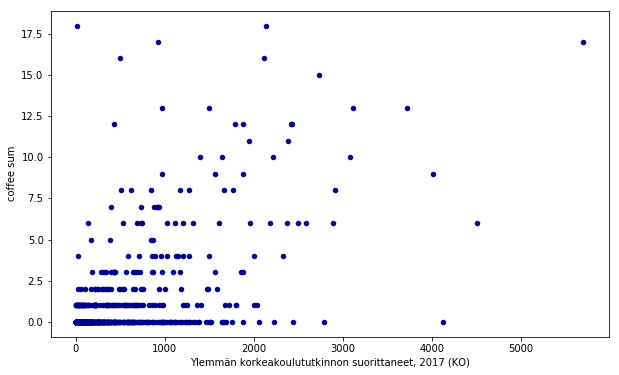

In [49]:
colname = paavo_fs_merged_coffee_df.columns[48]
print("Scatterplot between {} and {}".format(colname, "coffee sum"))

paavo_fs_merged_coffee_df.plot(kind='scatter', x=colname, y='coffee sum', figsize=(10,6), color="darkblue")
plt.show()

Scatterplot between 18 vuotta täyttäneet yhteensä, 2016 (HR) and coffee sum


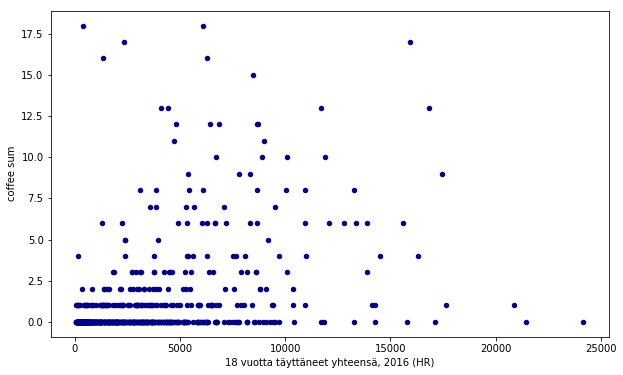

In [50]:
colname = paavo_fs_merged_coffee_df.columns[49]
print("Scatterplot between {} and {}".format(colname, "coffee sum"))

paavo_fs_merged_coffee_df.plot(kind='scatter', x=colname, y='coffee sum', figsize=(10,6), color="darkblue")
plt.show()

In [ ]:

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()



#### Step 3.5.4 - Analysis 4: Compare citywise cluster percentages etc.

In [ ]:
paavo_fs_merged_df[["PC", "PC Name", "PC City"]].head()

In [ ]:
paavo_fs_merged_df["PC City"] = ""

In [ ]:
paavo_fs_merged_df = paavo_fs_merged_df[list_order_to_top(["PC", "PC City", "PC Name"], paavo_fs_merged_df.columns.tolist())]

In [ ]:
paavo_fs_merged_df.head()

In [ ]:
for city in filter_cities:
        city_filter = paavo_fs_merged_df['PC Name'].str.contains(city)
        paavo_fs_merged_df[city_filter]["PC City"] = city


In [ ]:
import math

my_paikka = "99980"
map_test = None

filter = paavo_df["Postinumeroalue"].str.contains(my_paikka)
filtered_df = paavo_df[filter]
if filtered_df.shape[0] > 0:
    
    # look for my_paikka in paavo
    paikka_name = filtered_df.iloc[0,0]
    paikka_x = filtered_df.iloc[0,1]
    paikka_y = filtered_df.iloc[0,2]
    paikka_pinta_ala = filtered_df.iloc[0,3]
    paikka_radius = math.sqrt(int(paikka_pinta_ala))
    print("found: {}\nproceeding with coordinates x={}, y={}, area radius is {}m.".format(paikka_name, paikka_x, paikka_y, paikka_radius))

    # convert x,y coordinates to lon,lat
    p = pyproj.Proj(proj='utm',zone=35,ellps='WGS84') # use kwarg
    paikka_lon, paikka_lat = p(paikka_x, paikka_y, inverse=True)
    print("Converted coordinates: lat={}, lon={}".format(paikka_lat, paikka_lon))

    # show map
    my_color = "#050505"
    map_test = folium.Map(location=[paikka_lat, paikka_lon], zoom_start=12)
    
    # show postal code center location
    label = folium.Popup(paikka_name)
    folium.CircleMarker(
        [paikka_lat, paikka_lon],
        radius=35,
        popup=label,
        color=my_color,
        fill_color=my_color,
        fill_opacity=0.8).add_to(map_test)

    # show venues from FourSquare
    my_color = "#ff0525"
    for i in range(my_place_venues.shape[0]):
        v_name = my_place_venues.iloc[i, 3]
        v_lat = my_place_venues.iloc[i, 4]
        v_lon = my_place_venues.iloc[i, 5]
        v_cat = my_place_venues.iloc[i, 6]
        print(v_name, ", ", v_cat)
        label = folium.Popup(v_name + ", " + v_cat)
        folium.CircleMarker(
            [v_lat, v_lon],
            radius=80,
            popup=label,
            color=my_color,
            fill_color=my_color,
            fill_opacity=0.8).add_to(map_test)

    print("Ok, showing map.")

else:
    print("no match for {}".format(my_paikka))

map_test

In [ ]:
import math
math.sqrt(4)

# Folium

In [ ]:
# Comment / uncomment next line as needed.
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


In [ ]:
# create map

show_me = "utsjoki"

# Kaivari from above
kaivari_lat = 60.15777
kaivari_lon = 24.95355

utsjoki_lat = 69.90161
utsjoki_lon = 27.06928

kuopio_lat = 62.855642
kuopio_lon = 27.768541


lat = kaivari_lat
lon = kaivari_lon

if show_me == "utsjoki":
    lat = utsjoki_lat
    lon = utsjoki_lon
elif show_me == "kuopio":
    lat = kuopio_lat
    lon = kuopio_lon
    

map_test = folium.Map(location=[lat, lon], zoom_start=12)

label = folium.Popup("Kaivari")

folium.CircleMarker(
    [lat, lon],
    radius=35,
    popup=label,
    fill_opacity=0.8).add_to(map_test)


#    color=rainbow[cluster-1],
#    fill_color=rainbow[cluster-1],


map_test


In [ ]:
# sample code to calculate values from A to X and sum them up
"{:,}".format(paavo_df.T.iloc[76:98,0].astype(int).sum())
